<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 60.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
##Importar librerías 
#Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

3#Graficos
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot

#Modelado 
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importamos datos
datos = pm.datasets.load_lynx()
datos

array([ 269.,  321.,  585.,  871., 1475., 2821., 3928., 5943., 4950.,
       2577.,  523.,   98.,  184.,  279.,  409., 2285., 2685., 3409.,
       1824.,  409.,  151.,   45.,   68.,  213.,  546., 1033., 2129.,
       2536.,  957.,  361.,  377.,  225.,  360.,  731., 1638., 2725.,
       2871., 2119.,  684.,  299.,  236.,  245.,  552., 1623., 3311.,
       6721., 4254.,  687.,  255.,  473.,  358.,  784., 1594., 1676.,
       2251., 1426.,  756.,  299.,  201.,  229.,  469.,  736., 2042.,
       2811., 4431., 2511.,  389.,   73.,   39.,   49.,   59.,  188.,
        377., 1292., 4031., 3495.,  587.,  105.,  153.,  387.,  758.,
       1307., 3465., 6991., 6313., 3794., 1836.,  345.,  382.,  808.,
       1388., 2713., 3800., 3091., 2985., 3790.,  674.,   81.,   80.,
        108.,  229.,  399., 1132., 2432., 3574., 2935., 1537.,  529.,
        485.,  662., 1000., 1590., 2657., 3396.])

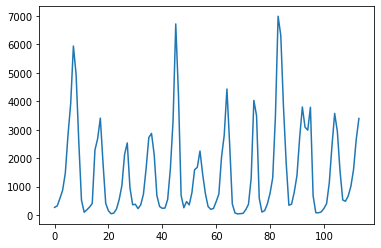

In [5]:
fig = plt.plot(datos)

In [7]:
#Test de Dickey fuller 
print('Resultados del Test de Dickey Fuller')
array = np.asarray(datos,dtype='float')
np.nan_to_num(array, copy=False)
dftest = adfuller(array, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Prueba estadística','p-value','Retrasos usados','Numero de observaciones usadas'])
for key,value in dftest[4].items():
  dfoutput['Valor crítico (%s)' %key] = value
print(dfoutput)

Resultados del Test de Dickey Fuller
Prueba estadística                 -2.996304
p-value                             0.035241
Retrasos usados                     7.000000
Numero de observaciones usadas    106.000000
Valor crítico (1%)                 -3.493602
Valor crítico (5%)                 -2.889217
Valor crítico (10%)                -2.581533
dtype: float64


In [8]:
yEntrenamiento, yPrueba = train_test_split(datos, train_size=100)

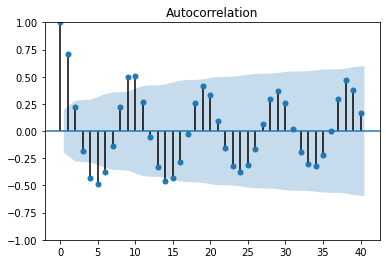

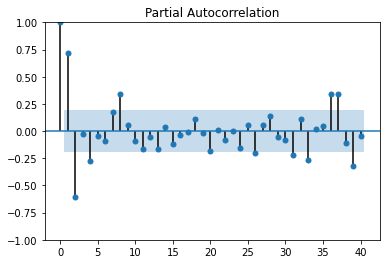

In [10]:
#Modelado
fig = sm.graphics.tsa.plot_acf(yEntrenamiento.squeeze(), lags=40)
fig = sm.graphics.tsa.plot_pacf(yEntrenamiento, lags=40)

In [12]:
modelo = pm.auto_arima(yEntrenamiento,start_p=1,start_q=1,max_p=5,max_q=5,seasonal = False,trace = True)
modelo.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1677.850, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1828.206, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1703.452, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1734.537, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1678.356, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1678.393, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1694.842, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1680.605, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1680.271, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1668.315, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1690.305, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1698.064, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1659.492, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1658.185, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -825.093
Date:                Fri, 27 May 2022   AIC                           1658.185
Time:                        23:51:22   BIC                           1668.606
Sample:                             0   HQIC                          1662.403
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    705.5953    225.823      3.125      0.002     262.991    1148.200
ar.L1          1.1280      0.073     15.411      0.000       0.985       1.271
ar.L2         -0.5850      0.097     -6.056      0.000      -0.774      -0.396
sigma2      8.573e+05   1.01e+05      8.476      0.000    6.59e+05    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.08
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                             0.91
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
predicciones, intervaloConfianza = modelo.predict(n_periods = yPrueba.shape[0], return_conf_int = True)

In [15]:
print("RMSE de prueba: %3f" % np.sqrt(mean_squared_error(yPrueba, predicciones)))

RMSE de prueba: 1012.840517


In [19]:
print("MAPE de prueba: %3f" % mean_absolute_percentage_error(yPrueba, predicciones))

MAPE de prueba: 0.963317


In [20]:
print("R2 de prueba: %3f" % r2_score(yPrueba, predicciones))

R2 de prueba: 0.197101


Text(0.5, 0, 'Año')

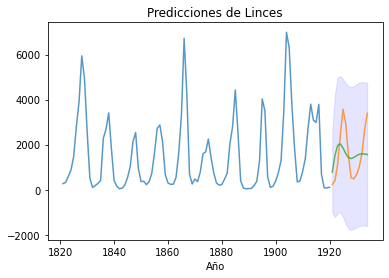

In [21]:
x_axis=np.arange(yEntrenamiento.shape[0] + predicciones.shape[0])
x_years = x_axis+1821

plt.plot(x_years[x_axis[:yEntrenamiento.shape[0]]], yEntrenamiento, alpha=0.75)
plt.plot(x_years[x_axis[yEntrenamiento.shape[0]:]], yPrueba, alpha=0.75)
plt.plot(x_years[x_axis[yEntrenamiento.shape[0]:]],predicciones, alpha=0.75)

plt.fill_between(x_years[x_axis[-predicciones.shape[0]:]],intervaloConfianza[:,0],intervaloConfianza[:,1],alpha=0.1, color='b')

plt.title('Predicciones de Linces')
plt.xlabel('Año')
